### Regression review and Classification

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import seaborn as sns

/Users/jacobkoehler/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
iris = load_iris()

In [44]:
X = iris.data
y = iris.target

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

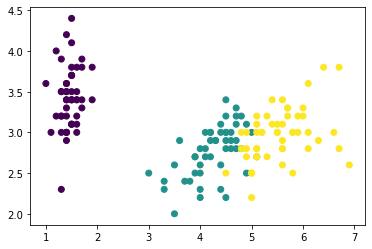

In [7]:
plt.scatter(X[:, 2], X[:, 1], c = y)

In [10]:
X[:5, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [11]:
X.shape

(150, 4)

In [24]:
X_train = X[:120, :]
X_test = X[120:, :]
y_train = y[:120]
y_test = y[120:]

In [13]:
sample_point = X_test[0, :]

In [14]:
sample_point

array([6.9, 3.2, 5.7, 2.3])

In [34]:
diff = X_train - sample_point

dists = np.apply_along_axis(np.linalg.norm, 1, diff)

import pandas as pd

dist_df = pd.DataFrame({'dists': dists, 'labels': y_train})

dist_df

dist_df.nsmallest(10, 'dists')['labels']

from collections import Counter

counter = Counter(dist_df.nsmallest(10, 'dists')['labels'])

counter.most_common()

In [35]:
def KNN(sample_point, n):
    diff = X_train - sample_point

    dists = np.apply_along_axis(np.linalg.norm, 1, diff)

   
    dist_df = pd.DataFrame({'dists': dists, 'labels': y_train})


    dist_df.nsmallest(n, 'dists')['labels']


    counter = Counter(dist_df.nsmallest(10, 'dists')['labels'])

    return counter.most_common()[0][0]

In [41]:
KNN(X_test[15], 15)

2

### The sklearn way

In [49]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

In [50]:
pipe = Pipeline([('scale', StandardScaler()),
                ('knn', KNeighborsClassifier())])

In [51]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [52]:
pipe.score(X_test, y_test)

0.23684210526315788

In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
def knn_fitter(n):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    return knn.score(X_test, y_test)

In [56]:
for i in range(1, 32, 2):
    print(i, knn_fitter(i))

1 0.3157894736842105
3 0.2894736842105263
5 0.34210526315789475
7 0.3157894736842105
9 0.3157894736842105
11 0.34210526315789475
13 0.23684210526315788
15 0.21052631578947367
17 0.2631578947368421
19 0.3684210526315789
21 0.34210526315789475
23 0.34210526315789475
25 0.3157894736842105
27 0.2894736842105263
29 0.2631578947368421
31 0.3157894736842105


In [61]:
pipe = Pipeline([('scale', StandardScaler()),
                ('knn', KNeighborsClassifier())])

params = {'knn__n_neighbors': [i for i in range(1, 50, 2)]}

grid = GridSearchCV(pipe, param_grid=params)

In [62]:
grid.fit(X_train, y_train)

/Users/jacobkoehler/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose

In [63]:
grid.score(X_test, y_test)

0.39473684210526316

In [64]:
grid.best_params_

{'knn__n_neighbors': 9}

### KNN for Regression

In [67]:
cars = pd.read_csv('mtcars.csv', index_col = 0)

In [68]:
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


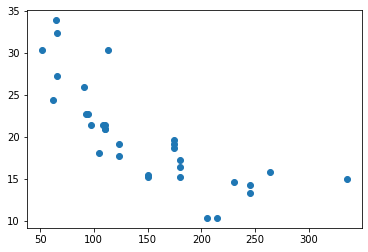

In [69]:
plt.scatter(cars.hp, cars.mpg)

In [71]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(cars[['hp']], cars['mpg'])

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [72]:
preds = knn_reg.predict(cars[['hp']])

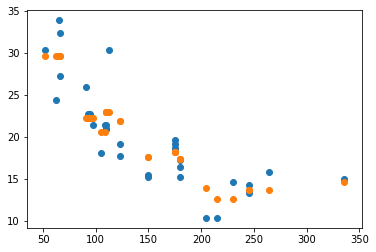

In [75]:
plt.scatter(cars.hp, cars.mpg)
plt.scatter(cars.hp, preds)

### KNN 

In [77]:
titanic = sns.load_dataset('titanic')

In [78]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [79]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [81]:
not_missing = titanic.dropna(subset = ['age'])
missing = titanic.loc[titanic['age'].isna()]

In [84]:
X = not_missing[['pclass', 'fare']]
y = not_missing['age']

In [86]:
knn = KNeighborsRegressor()
knn.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [87]:
missing['age'] = knn.predict(missing[['pclass', 'fare']])

/Users/jacobkoehler/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [88]:
missing

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,22.684,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,29.400,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,29.500,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,29.500,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,25.800,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,19.700,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,38.400,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,28.800,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,28.200,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [83]:
missing

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
